# Example session for calculating ENSO3.4 index

## Directly calling the module

In [5]:
from climate_index_collection.output import compute_index
from climate_index_collection.indices import (
    north_atlantic_oscillation,
    southern_annular_mode,
    el_nino_southern_oscillation_34,
)

In [6]:
compute_index?

Signature:
compute_index(
    data_path='../data/test_data/',
    data_source_name='FOCI',
    index_function=<function southern_annular_mode at 0x7fd0b73821f0>,
)
Docstring:
Compute index from data source and return xarray DataArray.

Parameters
----------
data_path: str | path
    Location of the data files. Defaults to "data/test_data/".
data_source_name: str
    Name of the model dataset. Defaults to "FOCI".
index_function: function
    Index function. Defaults to southern_annular_mode.

Returns
-------
xarray DataArray
File:      /work/climate_index_collection/output.py
Type:      function


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


<xarray.DataArray (time: 120)>
dask.array<mean_agg-aggregate, shape=(120,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2350-02-28 23:52:00 ... 2360-01-31 23:52:00

array(-0.00012995)

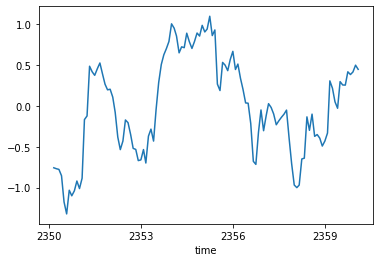

In [7]:
FOCI_ENSO = compute_index(
    data_path="../data/test_data/", 
    data_source_name="FOCI", 
    index_function=el_nino_southern_oscillation_34,
)
display(FOCI_ENSO)
FOCI_ENSO.plot();
FOCI_ENSO.mean().values

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


<xarray.DataArray (time: 120)>
dask.array<mean_agg-aggregate, shape=(120,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-03-01 00:00:00 ... 0011-02-01 00:00:00

array(-7.15131658e-14)

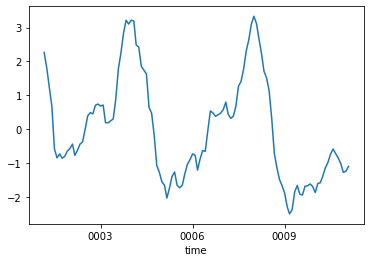

In [8]:
CESM_ENSO = compute_index(
    data_path="../data/test_data/", 
    data_source_name="CESM", 
    index_function=el_nino_southern_oscillation_34,
)
display(CESM_ENSO)
CESM_ENSO.plot()
CESM_ENSO.mean().values